In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [ ]:
print("Bacterial : ", len(os.listdir("/content/drive/MyDrive/Data/New_Augmnt/Bacterial")))
print("Downy Mildew: ", len(os.listdir("/content/drive/MyDrive/Data/New_Augmnt/Downy Mildew")))
print("Powdery Mildew: ", len(os.listdir("/content/drive/MyDrive/Data/New_Augmnt/Powdery Mildew")))
print("Septoria Blight: ", len(os.listdir("/content/drive/MyDrive/Data/New_Augmnt/Septoria Blight")))
print("Healthy: ", len(os.listdir("/content/drive/MyDrive/Data/New_Augmnt/Healthy")))
print("Wilt and leaf blight: ", len(os.listdir("/content/drive/MyDrive/Data/New_Augmnt/Wilt and leaf blight")))
print("Viral: ", len(os.listdir("/content/drive/MyDrive/Data/New_Augmnt/Viral")))

Bacterial :  184
Downy Mildew:  184
Powdery Mildew:  179
Septoria Blight:  184
Healthy:  188
Wilt and leaf blight:  184
Viral:  185


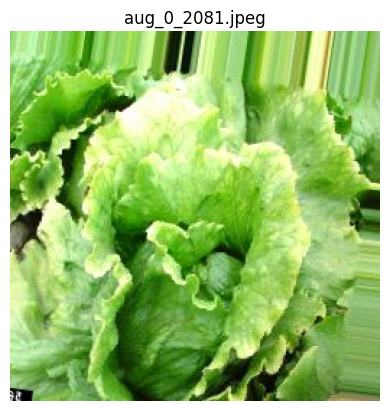

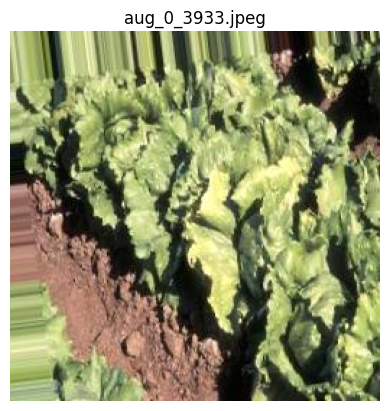

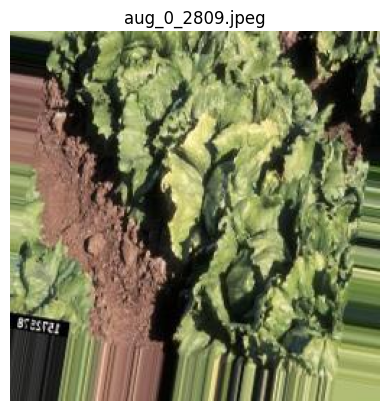

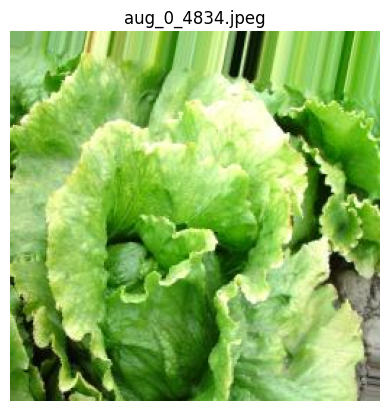

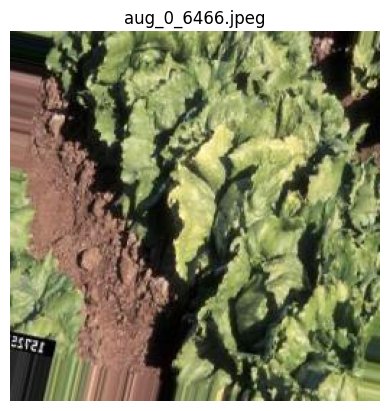

In [ ]:
# Specify the directory containing the images
image_dir = '/content/drive/MyDrive/Data/New_Augmnt/Viral'

# Get a list of files in the directory
file_list = os.listdir(image_dir)

# Filter out only image files (e.g., with extensions .png, .jpg, .jpeg)
image_files = [f for f in file_list if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select the first 5 image files
image_files = image_files[:5]

# Plot each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)

    # Load the image
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure()
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')  # Hide axis
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1/255.,
                    preprocessing_function=lambda x: tf.image.resize(x, (256, 256)),
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    validation_split = 0.2)
train_datagen

In [ ]:
base_dir = "/content/drive/MyDrive/Data/New_Augmnt"

train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size = (256, 256),
        class_mode = 'categorical',
        batch_size=32,
        subset = 'training')

validation_generator = train_datagen.flow_from_directory(
       base_dir,
       target_size = (256, 256),
       class_mode = 'categorical',
       batch_size=32,
       subset = 'validation')

Found 1179 images belonging to 8 classes.
Found 289 images belonging to 8 classes.


In [ ]:
train_generator.class_indices

{'Bacterial': 0,
 'Downy Mildew': 1,
 'Healthy': 2,
 'Powdery Mildew': 3,
 'Septoria Blight': 4,
 'Undefine': 5,
 'Viral': 6,
 'Wilt and leaf blight': 7}

# **Custom Model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
history2 = model.fit(train_generator, validation_data=validation_generator, epochs=50)

Epoch 1/50
37/37 [==============================] - 991s 27s/step - loss: 2.0103 - accuracy: 0.1925 - val_loss: 1.7621 - val_accuracy: 0.3391
Epoch 2/50
37/37 [==============================] - 33s 900ms/step - loss: 1.6872 - accuracy: 0.3376 - val_loss: 1.6054 - val_accuracy: 0.3806
Epoch 3/50
37/37 [==============================] - 33s 890ms/step - loss: 1.5995 - accuracy: 0.3664 - val_loss: 1.4891 - val_accuracy: 0.3806
Epoch 4/50
37/37 [==============================] - 38s 1s/step - loss: 1.5137 - accuracy: 0.3961 - val_loss: 1.4346 - val_accuracy: 0.4602
Epoch 5/50
37/37 [==============================] - 38s 1s/step - loss: 1.4609 - accuracy: 0.4453 - val_loss: 1.3634 - val_accuracy: 0.4983
Epoch 6/50
37/37 [==============================] - 33s 890ms/step - loss: 1.4508 - accuracy: 0.4402 - val_loss: 1.5113 - val_accuracy: 0.4498
Epoch 7/50
37/37 [==============================] - 34s 931ms/step - loss: 1.3342 - accuracy: 0.5030 - val_loss: 1.3816 - val_accuracy: 0.4775
Epoch 

Text(0.5, 0, 'Epoch')

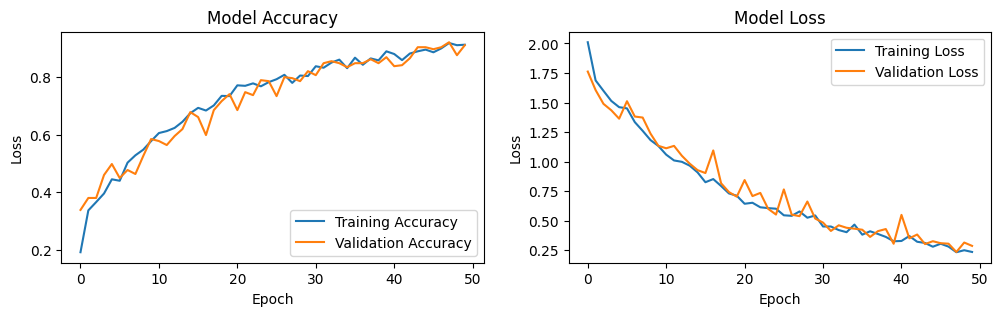

In [ ]:
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(train_acc)), train_acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# **Evaluation**

In [ ]:
model.save('model.keras')

In [ ]:
test_model = tf.keras.models.load_model('model.keras')

# model evaluation
validation_loss, validation_accuracy = test_model.evaluate(validation_generator)
print(f'Validation loss: {validation_loss}')
print(f'Validation accuracy: {validation_accuracy}')

10/10 [==============================] - 6s 542ms/step - loss: 0.2939 - accuracy: 0.9066
Validation loss: 0.29385629296302795
Validation accuracy: 0.9065743684768677


Saving healthy.jpg to healthy.jpg
1/1 [==============================] - 0s 88ms/step


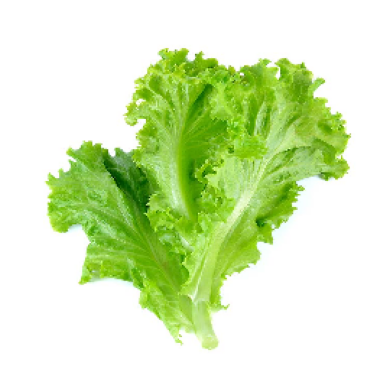

Hasil prediksi untuk gambar: healthy.jpg
Kelas: Bacterial, Persentase Prediksi: 0.00%
Kelas: Downy Mildew, Persentase Prediksi: 0.01%
Kelas: Healthy, Persentase Prediksi: 99.03%
Kelas: Powdery Mildew, Persentase Prediksi: 0.00%
Kelas: Septoria Blight, Persentase Prediksi: 0.00%
Kelas: Undefine, Persentase Prediksi: 0.00%
Kelas: Viral, Persentase Prediksi: 0.96%
Kelas: Wilt and leaf blight, Persentase Prediksi: 0.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from google.colab import files
from keras.models import load_model

# Upload gambar dari komputer lokal
uploaded = files.upload()

# Path ke model yang telah dilatih
model_path = "/content/model.keras"

# Daftar kelas
class_names = {
    0: 'Bacterial',
    1: 'Downy Mildew',
    2: 'Healthy',
    3: 'Powdery Mildew',
    4: 'Septoria Blight',
    5: 'Undefine',
    6: 'Viral',
    7: 'Wilt and leaf blight'
}

# Memuat model
model = load_model(model_path)
img_height = 256
img_width = 256
# Fungsi untuk memprediksi kelas gambar
def predict_class(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)[0]
    return img, predictions

# Menampilkan hasil prediksi untuk setiap gambar yang diunggah
for filename in uploaded.keys():
    img_path = '/content/' + filename
    img, predictions = predict_class(img_path)

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f'Hasil prediksi untuk gambar: {filename}')
    for i, class_name in class_names.items():
        print(f'Kelas: {class_name}, Persentase Prediksi: {predictions[i] * 100:.2f}%')

# tf.lite

In [ ]:
export_dir = "exp_model"
tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
with open('custom_model.tflite', 'wb') as f:
  f.write(tflite_model)

# tf.js

In [ ]:
from tensorflow.python.saved_model.save import save

save_dir = os.path.join('/tmp/', 'new_model/saved_model.h5')
model.save(save_dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip3 install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 116.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
   

In [ ]:
!cd /tmp/new_model/
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /tmp/new_model/saved_model.h5 /tmp/tfjs_new_model

2024-06-16 02:17:03.569042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 02:17:04.610334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip -r /tmp/tfjs_new_model/model.zip /tmp/tfjs_new_model

  adding: tmp/tfjs_new_model/ (stored 0%)
  adding: tmp/tfjs_new_model/group1-shard5of7.bin (deflated 8%)
  adding: tmp/tfjs_new_model/model.json (deflated 87%)
  adding: tmp/tfjs_new_model/group1-shard6of7.bin (deflated 8%)
  adding: tmp/tfjs_new_model/group1-shard7of7.bin (deflated 8%)
  adding: tmp/tfjs_new_model/group1-shard2of7.bin (deflated 8%)
  adding: tmp/tfjs_new_model/group1-shard4of7.bin (deflated 8%)
  adding: tmp/tfjs_new_model/group1-shard1of7.bin (deflated 8%)
  adding: tmp/tfjs_new_model/group1-shard3of7.bin (deflated 8%)
